# Artificial Intelligence
## L2 International, Univ. Bordeaux

### Unsupervised Learning

In unsupervised machine learning algorithms, we do not have any supervisor to provide any guidance. We do not have correct answers and algorithms need to discover the interesting pattern in data for learning. One of the most used approaches in this domain is clustering. It aims to divide the set of observations into subsets, called clusters, in such a way that observations in the same cluster are similar and they are dissimilar to the observations in other clusters.

#### Exercise 1. k-means
This first example is an adaptation of:

https://www.tutorialspoint.com/artificial_intelligence_with_python/artificial_intelligence_with_python_unsupervised_learning_clustering.htm

$K$-means clustering algorithm is one of the well-known algorithms for clustering the data. The algorithm acts in an iterative way and is parametrised by $K$: the numbers of clusters we want to get.

1. Import the following python modules
matplotlib.pyplot,  seaborn, sns.set(), numpy and KMeans from the sklearn library.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

2. Execute the following code and observe what you obtain:

In [ ]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples = 500, centers = 4,
            cluster_std = 0.40, random_state = 0)

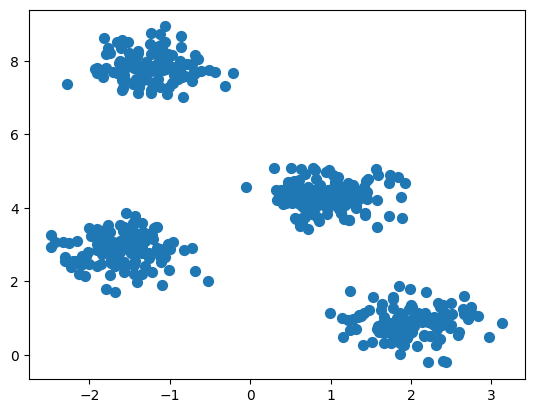

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s = 50);
plt.show()

We can observe four clusters being created.

3. Initialise km to be the K-means algorithm, with the required parameter of how many clusters(n_clusters).

In [ ]:
km = KMeans(4) # Write the correct number of clusters

4. Train the K-means model with the input data X

Check the use of `fit()` function


In [ ]:
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

5. Execute the following code to visualise the result of your training:

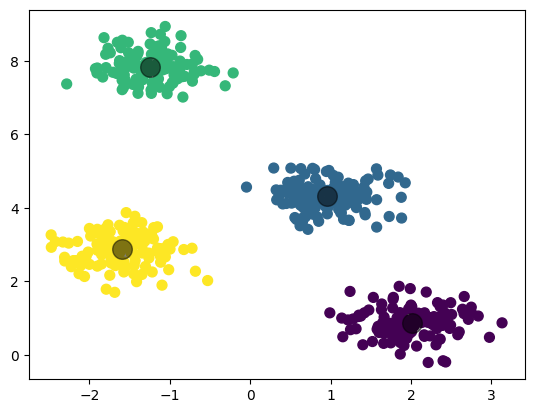

In [ ]:
y_kmeans = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()

Comment on what you observed after running the code for K-Means.

ANSWER: After we ran the code, we can see that each cluster had changed their colour and now has a center. So, the algorithm computed the mean of the clusters.




### Exercise 2. $K$-Means Algorithm for Colour Compression.

One interesting application of clustering is in colour compression within images. For example, imagine you have an image with millions of colours. In most images, a large number of the colours will be unused, and many of the pixels in the image will have similar or even identical colours. While observing we will not be able to distinguish all these colours. Using less number of colours can help with compressing the size of the image

Execute the following code:

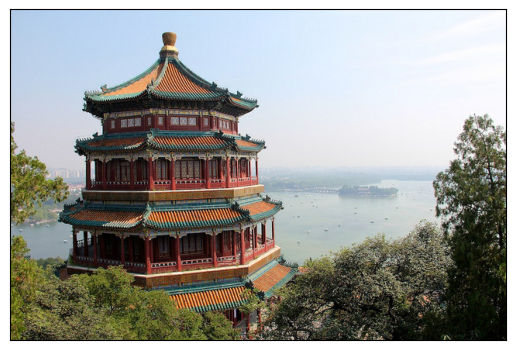

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

We can observe that an image from sklearn appears on the screen.

1. Explain the result of the following instruction:

In [ ]:
china.shape

(427, 640, 3)


The numbers represent the dimensions of the picture: the width and length. The last number is the number of channels: red, green and blue (RGB).

2. On can see the image as a set of pixels and hence as as a cloud of points in a three-dimensional colour space.
Write the code to `reshape` this image to `[n_samples * n_features]`, and then rescale the different values of the colours so that they lie between 0 and 1.

In [ ]:
# Write code here
data=china/255.0
data=data.reshape(427*640,3)
data.shape


(273280, 3)

You can use the given function `plot_pixels` to visualise a subset of pixels.


Execute the code and comment on what you observe as the result

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

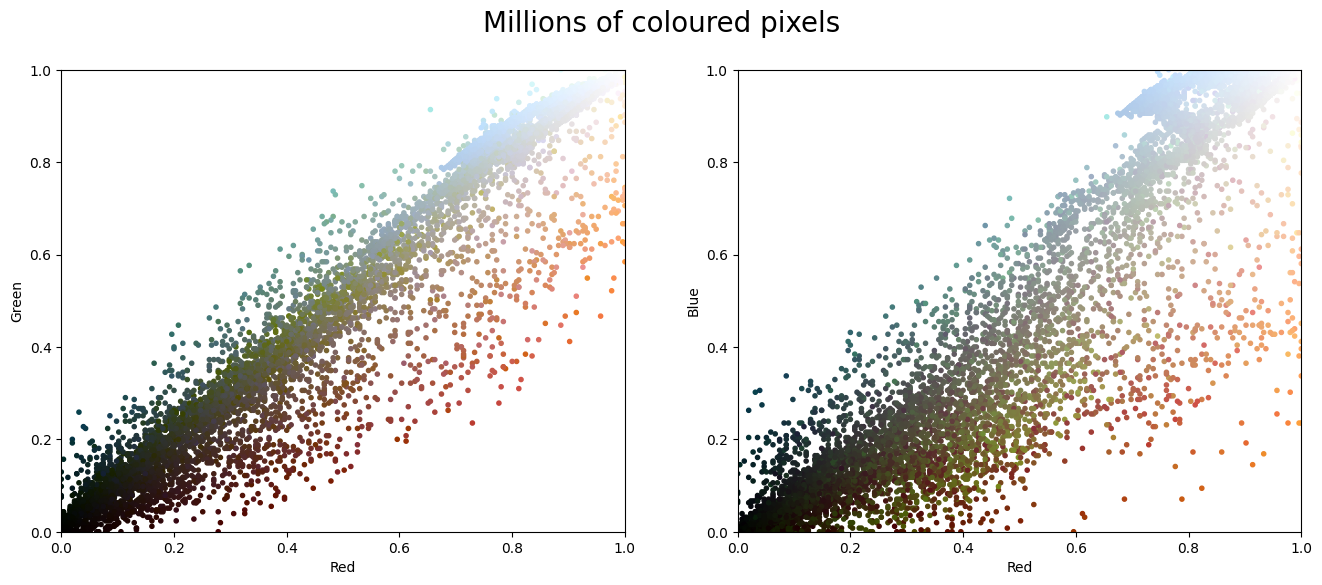

In [ ]:
plot_pixels(data,title='Millions of coloured pixels')

Now we will use k-means algorithm to reduce these 16 million colours to just 16 colours.  
We will use a slightly different implementation of this algorithm. We will use the mini batch k-means which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm.

1. Give python instructions to obtain the new colours (the min batch k-means algorithm is implemented using `MiniBatchKMeans` function in `sklearn.cluster` module.

In [ ]:
# Write the code to use Mini Batch K-Means and fit your data
from sklearn.cluster import MiniBatchKMeans
kMeans=MiniBatchKMeans(16)
kMeans.fit(data)
# Get the new_colors using this model and predict it on data
new_colors=kMeans.cluster_centers_[kMeans.predict(data)]


Execute the following instructions to observe the result:

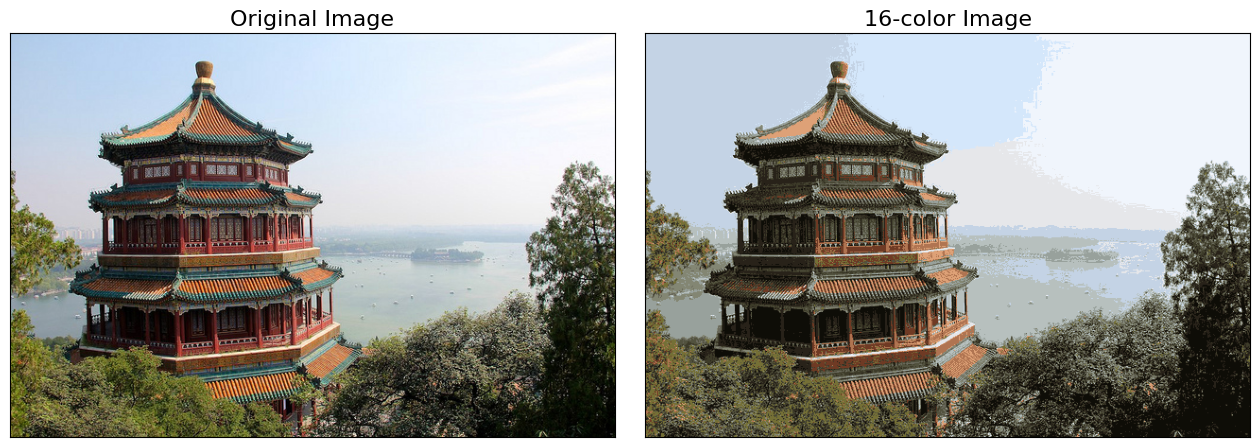

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Comment on what you observe the intial number of colours and the ones after the K-Means

We can observe that after applying the K-means algorithm to reduce the range of colors, the image is not as clear as before. However, it is still easily recognizable and a lot easier to store and transmit. Furthermore, processing the image will be faster because we are working with a smaller color palette.